# Расчет тензора инерции для кельтского камня

In [1]:
import numpy as np
import scipy
import sympy as sm
import matplotlib.pyplot as plt
plt.rcParams["text.latex.preamble"]=r"\usepackage{amsmath}"
plt.rcParams['text.usetex'] = True
from mpl_toolkits.mplot3d import axes3d  

# чтобы работала 3D-крутилка
%matplotlib ipympl  

# Работа с физическими величинами
%load_ext PhysicalQuantities.ipython

# Надо когда-нибудь попробовать и распространение ошибки, но тут это явно лишнее.
#from uncertainties import ufloat
#from uncertainties.umath import *

# Точность
%precision 1

'%.1f'

![](pics/rb-sizes-and-weight.svg)

In [2]:
import sympy as sm

In [3]:
Длина = 95.6mm
Ширина = 17.7mm
Высота = 10.9mm
Вес = 11g 

Длина, Ширина, Высота, Вес

(95.6 mm, 17.7 mm, 10.9 mm, 11 g)

![](pics/rb-for-volume-density.svg)

In [4]:
Вес_с_водой = 479g
Вес_без_воды = 251g
Вес_с_водой_и_камнями = 501g
Высота_без_камней = 70.5mm
Высота_c_камнями = 75.7mm
Диаметр_стакана = 71.1mm

Объем_камней = np.pi * Диаметр_стакана**2 / 4 * (Высота_c_камнями - Высота_без_камней)
#Объем_воды = np.pi * Диаметр_стакана**2 / 4 * Высота_без_камней
Плотность_камней = (Вес_с_водой_и_камнями - Вес_с_водой) / Объем_камней

Плотность_камней

0.0 $\frac{\text{g}}{\text{mm}^3}$

In [5]:

#Плотность_воды = (Вес_с_водой - Вес_без_воды) / Объем_воды
Плотность_камней.to("kg/m**3") #, Плотность_воды.to("kg/m**3")
# Грубо, но в порядок плотностей пластиков попадает.


1065.6 $\frac{\text{kg}}{\text{m}^3}$

#Полуось $x_a$ в сантиметрах:

In [6]:
a = Длина.to('cm').value/2
a 

4.8

Полуось x_b в сантиметрах:

In [7]:
b = Ширина.to('cm').value/2
b

0.9

Полуось x_с в сантиметрах:

In [8]:
c = Высота.to('cm').value/2
c

0.5

Плотность «кг/м^3»

In [9]:
density = Плотность_камней.to("kg/m**3").value
density

1065.6

Что-то я завалил задачу про момент инерции полушара. Решу-ка я ее с simpy (потом бы ее с simpy mechanics)

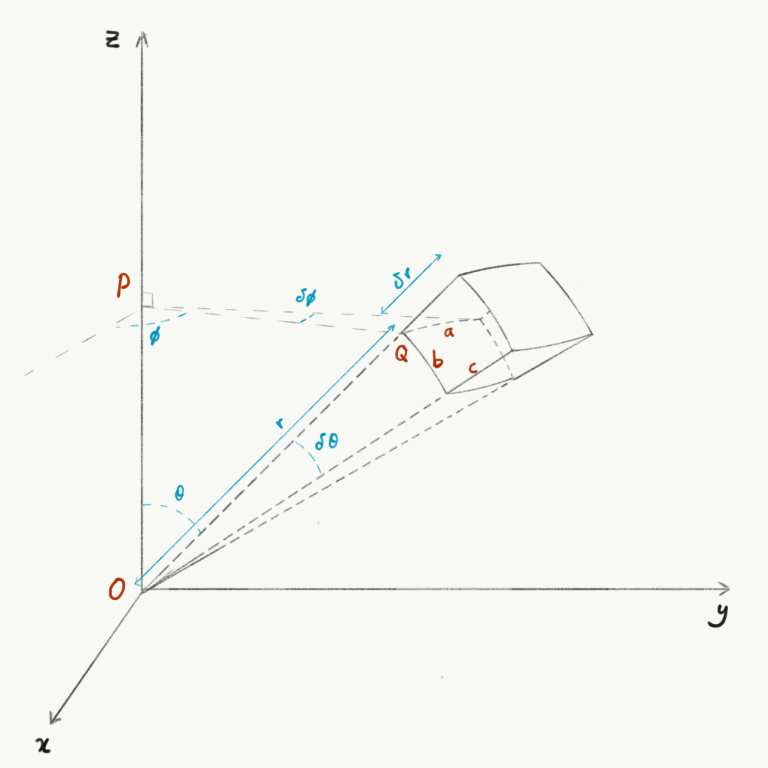

$$  a = PQ \delta \phi $$
$$  b = r \delta \theta $$
$$  c = \delta r $$

Элементарный объем
$$
   \delta V \approx a × b × c \approx r \sin \theta \delta \phi × r \delta \theta × \delta r \approx r^2 \sin \theta \delta \phi \theta \delta r
$$


In [18]:
m, x, y, r, theta, phi, R = sm.symbols('m x y r theta phi R')
элементарный_объем = r ** 2 * sm.sin(phi)

объем_полушара = sm.integrate(элементарный_объем, 
                                (r,     0, R), 
                                (phi,   0, sm.pi), 
                                (theta, 0, sm.pi))
объем_полушара
                            


2*pi*R**3/3

In [19]:
плотность_шара = m / объем_полушара
# покрутим вокруг оси y
радиус_вращения = r * sm.sin(phi)

момент_инерции_полушара = sm.integrate( радиус_вращения**2 * плотность_шара * элементарный_объем, 
                                (r,     0, R), 
                                (phi,   0, sm.pi), 
                                (theta, 0, sm.pi))

момент_инерции_полушара

2*R**2*m/5

In [12]:

сдвиг_центра_масс = sm.integrate( x * sm.pi * (R**2 - x**2), (x, 0, R)) / объем_полушара
расстояние_от_точки_подвеса_до_центра_масс = sm.sqrt(сдвиг_центра_масс**2 + R**2)
момент_инерции_относительно_оси_шара = момент_инерции_полушара              #2 * m * R**2 / 5    # попробовать вывести
момент_инерции_относительно_центра_масс = момент_инерции_относительно_оси_шара - m * сдвиг_центра_масс**2
момент_инерции_относительно_подвеса = момент_инерции_относительно_центра_масс + m * расстояние_от_точки_подвеса_до_центра_масс**2 
момент_инерции_относительно_подвеса


7*R**2*m/5

In [13]:
#тоже самое, сдвинув систему отсчета вниз.
сдвиг_центра_масс = sm.integrate( x* sm.pi * x**2, (x, 0, R)) / объем_полушара
расстояние_от_точки_подвеса_до_центра_масс = sm.sqrt( (R-сдвиг_центра_масс)**2 + R**2)
момент_инерции_относительно_оси_шара = 2 * m * R**2 / 5    # попробовать вывести
момент_инерции_относительно_центра_масс = момент_инерции_относительно_оси_шара - m * (R-сдвиг_центра_масс)**2
момент_инерции_относительно_подвеса = момент_инерции_относительно_центра_масс + m * расстояние_от_точки_подвеса_до_центра_масс**2 
момент_инерции_относительно_подвеса

7*R**2*m/5

In [14]:
def текст_для_тензора(I, заголовок):
    '''
    Вспомогательная функция, делает латех-код с заголовком по нумпай матрице.
    '''
    латех_для_матрицы = ''
    латех_строки_матрицы = []
    for i in range(I.shape[0]):
        латех_строка_матрицы = ' & '.join([f'{I[i, j]:.5f}' for j in range(I.shape[1])])
        латех_строки_матрицы.append(латех_строка_матрицы) 
    латех_для_матрицы = rf'''
        $\hspace*{{1cm}}\text{{ {заголовок} }} \small \begin{{bmatrix}} \frac{{kg*m^2}}{{10^6}} \end{{bmatrix}} \\ \normalsize \hspace*{{2cm}} \begin{{bmatrix}} ''' + r' \\ '.join(латех_строки_матрицы) + rf''' \end{{bmatrix}} $        ''' 
    return латех_для_матрицы   

In [15]:
def физические_величины_в_матрицу_эксперимент():
    плотность = Плотность_камней
    a = Длина
    b = Ширина
    c = Высота
    масса_полуэллипсоида = 2 * np.pi * a * b * c * плотность / 3
    I_1 = np.array([
        [b**2 + c**2, 0, 0],      
        [0,  a**2+c**2,  0],      
        [0,  0,  a**2 + b**2],      
    ]) * масса_полуэллипсоида
    return масса_полуэллипсоида, I_1

физические_величины_в_матрицу_эксперимент()



(41.2 g,
 [[17786.5 mm^2 0.0 0.0]
  [0.0 381093.6 mm^2 0.0]
  [0.0 0.0 389099.0 mm^2]] g)

In [16]:
def функция_эллипсоида(a, b, c, r, u, v):
    x = a * r * np.outer(np.cos(u), np.sin(v))
    y = b * r * np.outer(np.sin(u), np.sin(v))
    z = c * r * np.outer(np.ones_like(u), np.cos(v))
    return x, y, z
    


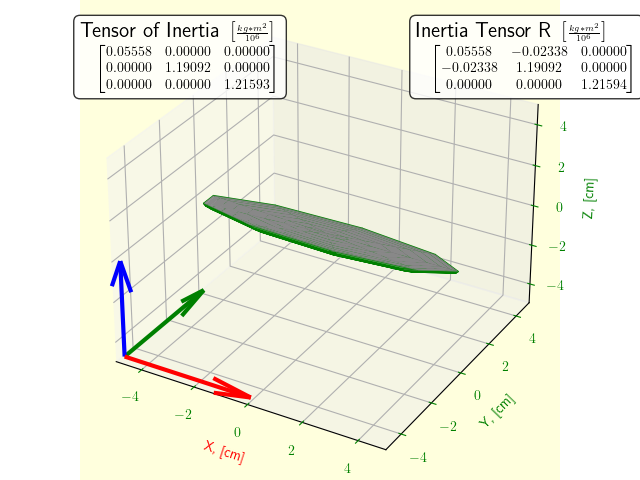

In [17]:
def визуализируем_камень():
        angle=30    # Угол отклонения в градусах
        lenght=3    # Длина отклонения в см.
        devmass=3   # масса отклонения в граммах.
        
        ra = a*0.01
        rb = b*0.01
        rc = c*0.01
        xchange = 2 * devmass * 0.001 * ((lenght*0.01*np.sin(np.radians(angle)))**2)
        ychange = 2 * devmass * 0.001 * ((lenght*0.01*np.cos(np.radians(angle)))**2)
        xychange = -1 *devmass * 0.001 * (lenght**2)*(np.sin(np.radians(angle*2)))
        rmass = ( 2 * np.pi * ra * rb * rc * density) / (3*10)

        I_1 = np.array([
            [rb**2 + rc**2, 0, 0],      
            [0,  ra**2+rc**2,  0],      
            [0,  0,  ra**2 + rb**2],      
        ]) * rmass * (10**6) 

        I_r = I_1 + np.array([
            [xchange, xychange, 0],      
            [xychange,  ychange,  0],      
            [0,  0,  xchange+ychange],      
        ]) 



        def параметрическая_кривая_для_эллипсоида(u, v):
            # Параметрическая кривая для эллипсоида https://stackoverflow.com/questions/7819498/plotting-ellipsoid-with-matplotlib    
            x = a * np.outer(np.cos(u), np.sin(v))
            y = b * np.outer(np.sin(u), np.sin(v))
            z = c * np.outer(np.ones_like(u), np.cos(v))
            return x, y, z

        def текст_на_графике(x, y, text):
            ax.text2D(x, y, text, transform=ax.transAxes, 
                    fontsize=15, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

        fig = plt.figure()
        ax = fig.add_subplot(1,1,1, projection='3d',  position=[0, 0, 1, 1])
        ax.set_facecolor('#ffffdd')
        ax.grid(color='green')

        ax.set_xlabel('X, [cm]', color='red')
        ax.set_ylabel('Y, [cm]', color='green')
        ax.set_zlabel('Z, [cm]', color='green')

        # возьмем по длине камня
        предел = a 
        ax.set_xlim([-предел, предел])
        ax.set_ylim([-предел, предел])
        ax.set_zlim([-предел, предел])
        
        ax.tick_params(colors='green')

        # русский в надписях сходу не заработал, надо возится с шаблонами латеха.
        текст_на_графике(0, 1, текст_для_тензора(I_1, 'Tensor of Inertia'))
        текст_на_графике(0.7, 1, текст_для_тензора(I_r, 'Inertia Tensor R'))

        точек_в_поверхности = 10
        # угол по YAW-плоскости
        u = np.linspace(0, 2 * np.pi, точек_в_поверхности)
        # угол по нижней полусфере
        v = np.linspace(np.pi/2, np.pi, точек_в_поверхности)

        x, y, z = параметрическая_кривая_для_эллипсоида(u, v)
        ax.plot_surface(x, y, z, color='white', edgecolor='green', zorder = 0.5)
        z_крышка_эллипсоида = np.zeros_like(z)

        ax.plot_surface(x, y, z_крышка_эллипсоида, color = 'white', zorder = 1)

        #рисуем стрелки осей
        ax.quiver(-предел, -предел, -предел, предел, 0, 0, color='red', alpha=1, lw=3, zorder = 10000) 
        ax.quiver(-предел, -предел, -предел, 0, предел, 0, color='green', alpha=1, lw=3)  
        ax.quiver(-предел, -предел, -предел, 0, 0, предел, color='blue', alpha=1, lw=3)

визуализируем_камень()